[*********************100%***********************]  5 of 5 completed
2024/2024 [==============================] - 38s 17ms/step - loss: 0.0023


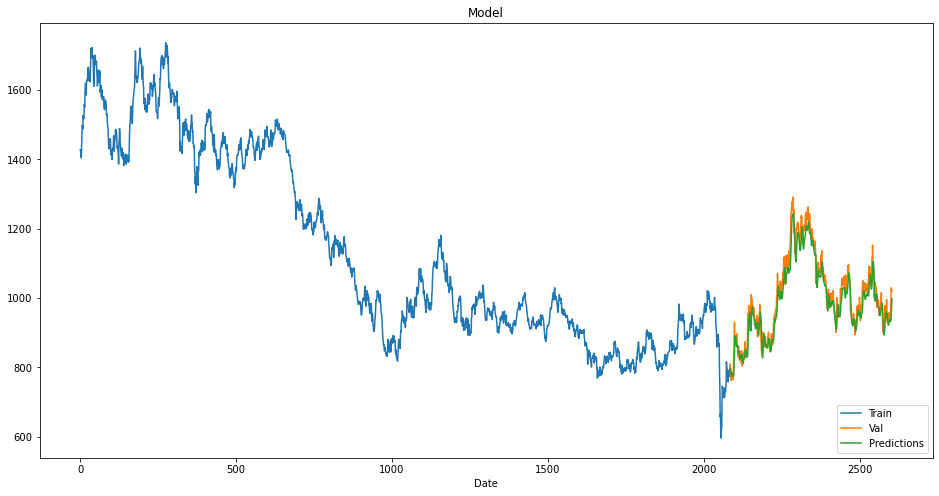

In [19]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import plotly.express as px
import os
import datetime
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import csv
import warnings
warnings.filterwarnings("ignore")

os.chdir('C:/Users/Sven Konermann/Documents/GitHub/DataScience/Data')

import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
tickers_list= ['PL=F','GC=F', 'CL=F', 'SI=F', 'ZW=F']
data = yf.download(tickers_list, '2012-1-1')['Adj Close']

#Scraping Loop
x=0
while x < len(tickers_list):
    data.to_csv(tickers_list[x]+"_Test1.csv")
    df = pd.read_csv(tickers_list[x]+"_Test.csv", delimiter=',', header=0, index_col=False)

#Data Normalization

    data = df.filter([tickers_list[x]])
    dataset = data.values
    training_data_len = math.ceil(len(dataset) * .8)
    training_data_len
    
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(dataset)

    train_data = scaled_data[0:training_data_len ,:]

    x_train = []
    y_train = []

    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)
    
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
    
#Model

    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    
    model.compile(optimizer='RMSprop', loss='mean_squared_error')
    
    model.fit(x_train, y_train, batch_size=1, epochs=1)
    
    test_data = scaled_data[training_data_len - 60: , :]
    x_test = []
    y_test = dataset[training_data_len:, :]
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])
        
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
    
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)
    
    rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
    
    train = data[:training_data_len]
    valid = data[training_data_len:]
    valid['Predictions'] = predictions
    plt.figure(figsize=(16,8))
    plt.title('Model')
    plt.xlabel('Date')
    plt.plot(train[tickers_list[x]])
    plt.plot(valid[[tickers_list[x], 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.show
    
    plt.savefig(tickers_list[x]+'.png')
    
    valid.to_csv(tickers_list[x]+'_valid.csv')
    
    score=(sum(abs(valid[tickers_list[x]]-valid['Predictions'])/valid[tickers_list[x]])/len(valid[tickers_list[x]]))*100
    score1=[]
    score1.append(score)
        
    acc_score=(1-sum(abs(valid[tickers_list[x]]-valid['Predictions'])/valid[tickers_list[x]])/len(valid[tickers_list[x]]))*100
    acc_score1=[]
    acc_score1.append(acc_score)
    x+=100

with open('score.csv', 'w') as f: 
    write = csv.writer(f) 
    write.writerow(score1)  
        
with open('accscore.csv', 'w') as f: 
    write = csv.writer(f) 
    write.writerow(acc_score1) 

In [20]:
x=0
df = pd.read_csv(tickers_list[x]+"_Test1.csv", delimiter=',', header=0, index_col=False)
df = np.array(df)
count = 0
rows = len(df)
columns = len(df[1])
for x in range(0,rows):
    for y in range(0,columns):
        if(df[x][y] in {'NaN','infinity','nan','Infinity',''}):
            df = np.delete(df,x,0)
            count = count +1
print("Deleted Rows: "+str(count))

Deleted Rows: 0
